In [2]:
!pip install tensorflow

In [5]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
data = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
data
type(data)

tuple

In [8]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [57]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [60]:
model.fit(X_train, y_train, epochs=10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.4287 - accuracy: 0.8762
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2041 - accuracy: 0.9410
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1645 - accuracy: 0.9520
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1365 - accuracy: 0.9597
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1179 - accuracy: 0.9651
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9679
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9722
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9743
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9771
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9781

In [61]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.9677
Accuracy:  96.77000045776367


In [68]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/5.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

img_array = image.img_to_array(img)
img_array = img_array / 255.0

img_array = img_array.reshape(1, 28 * 28)


In [69]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)



1/1 [==============================] - 0s 18ms/step


In [70]:
print(f'Predicted class: {predicted_class[0]}')


Predicted class: 3


# **SVM** (97.92%)

In [83]:
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy * 100)


SVM Accuracy: 97.92


In [84]:
print(svm_predictions[0])

7


In [85]:
y_test[0]

7

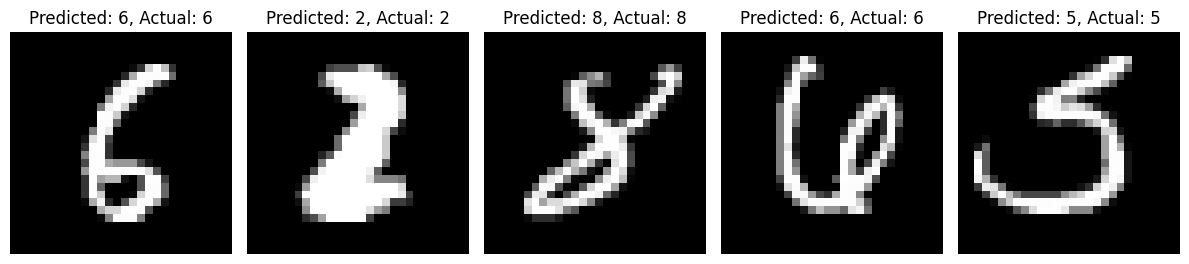

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Select random indices to compare
random_indices = np.random.choice(len(X_test), 5)

# Arrange images in a grid
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(random_indices) // num_cols)  # Ceiling division to calculate number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, idx in enumerate(random_indices):
    # Get prediction and actual label
    prediction = svm_predictions[idx]
    actual_label = y_test[idx]

    # Reshape and plot the image
    image = X_test[idx].reshape(28, 28)
    ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()



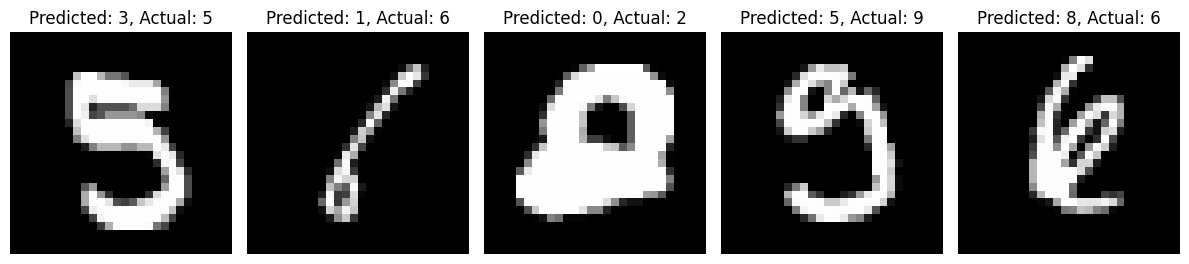

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Find indices where predictions are wrong
wrong_indices = np.where(svm_predictions != y_test)[0]

# Select random wrong prediction indices if available
if len(wrong_indices) > 0:
    num_samples = min(5, len(wrong_indices))
    num_cols = 5  # Number of columns in the grid
    num_rows = -(-num_samples // num_cols)  # Ceiling division to calculate number of rows

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

    for i, idx in enumerate(np.random.choice(wrong_indices, num_samples, replace=False)):
        # Get prediction and actual label
        prediction = svm_predictions[idx]
        actual_label = y_test[idx]

        # Reshape and plot the image
        image = X_test[idx].reshape(28, 28)
        ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No wrong predictions found.")


# **KNN** (96.88%)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy * 100)


KNN Accuracy: 96.88


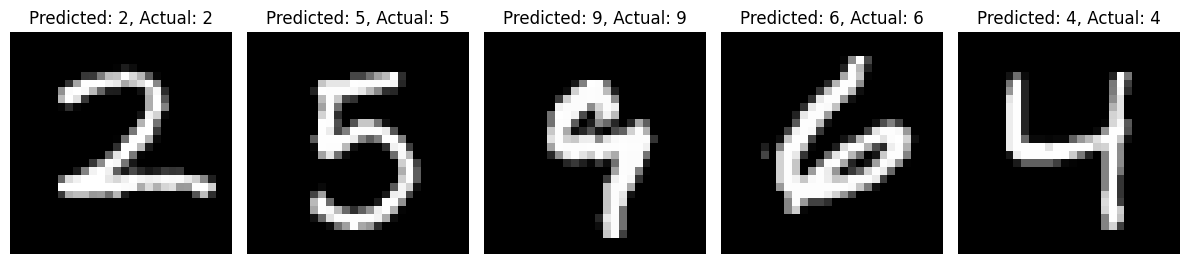

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Select random indices to compare
random_indices = np.random.choice(len(X_test), 5)

# Arrange images in a grid
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(random_indices) // num_cols)  # Ceiling division to calculate number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, idx in enumerate(random_indices):
    # Get prediction and actual label
    prediction = knn_predictions[idx]
    actual_label = y_test[idx]

    # Reshape and plot the image
    image = X_test[idx].reshape(28, 28)
    ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


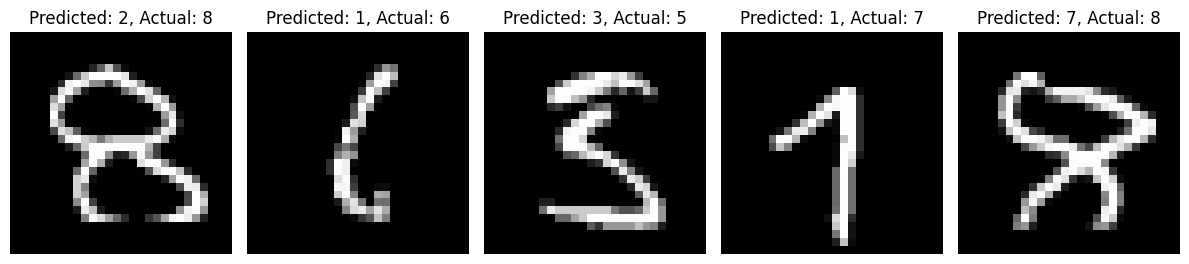

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Find indices where predictions are wrong
wrong_indices = np.where(knn_predictions != y_test)[0]

# Select random wrong prediction indices if available
if len(wrong_indices) > 0:
    num_samples = min(5, len(wrong_indices))
    num_cols = 5  # Number of columns in the grid
    num_rows = -(-num_samples // num_cols)  # Ceiling division to calculate number of rows

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

    for i, idx in enumerate(np.random.choice(wrong_indices, num_samples, replace=False)):
        # Get prediction and actual label
        prediction = knn_predictions [idx]
        actual_label = y_test[idx]

        # Reshape and plot the image
        image = X_test[idx].reshape(28, 28)
        ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No wrong predictions found.")


# **RANDOM FOREST CLASSIFIER** (97.14%)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)


rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy * 100)

Random Forest Accuracy: 97.14


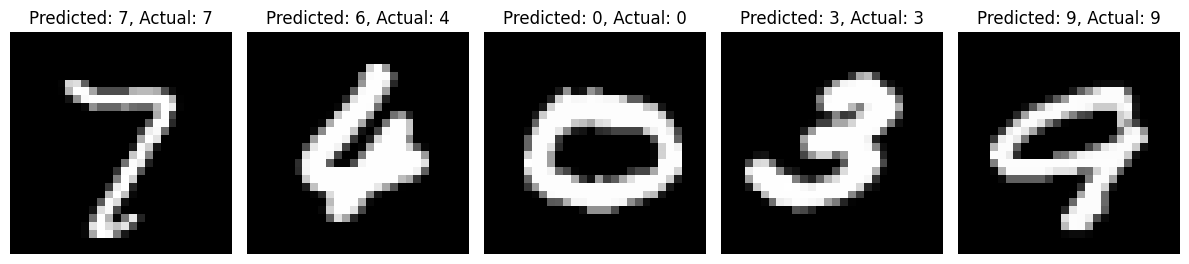

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Select random indices to compare
random_indices = np.random.choice(len(X_test), 5)

# Arrange images in a grid
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(random_indices) // num_cols)  # Ceiling division to calculate number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, idx in enumerate(random_indices):
    # Get prediction and actual label
    prediction = rf_predictions[idx]
    actual_label = y_test[idx]

    # Reshape and plot the image
    image = X_test[idx].reshape(28, 28)
    ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

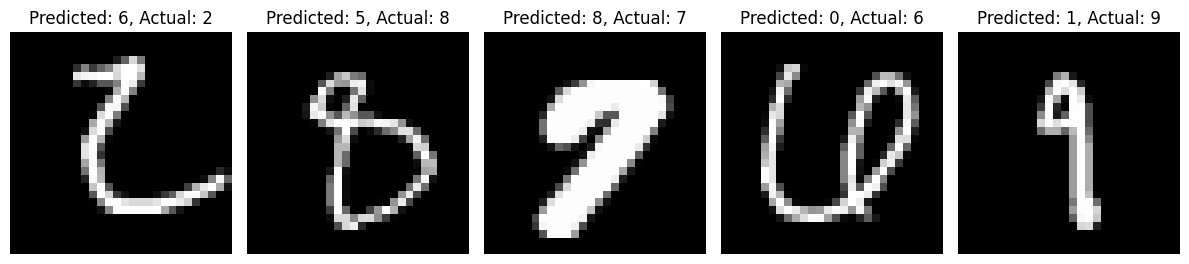

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Find indices where predictions are wrong
wrong_indices = np.where(rf_predictions != y_test)[0]

# Select random wrong prediction indices if available
if len(wrong_indices) > 0:
    num_samples = min(5, len(wrong_indices))
    num_cols = 5  # Number of columns in the grid
    num_rows = -(-num_samples // num_cols)  # Ceiling division to calculate number of rows

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

    for i, idx in enumerate(np.random.choice(wrong_indices, num_samples, replace=False)):
        # Get prediction and actual label
        prediction = rf_predictions [idx]
        actual_label = y_test[idx]

        # Reshape and plot the image
        image = X_test[idx].reshape(28, 28)
        ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No wrong predictions found.")

# **XGBOOST CLASSIFIER** ( 97.95%)


In [94]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Classifier Accuracy:", xgb_accuracy * 100)


XGBoost Classifier Accuracy: 97.95


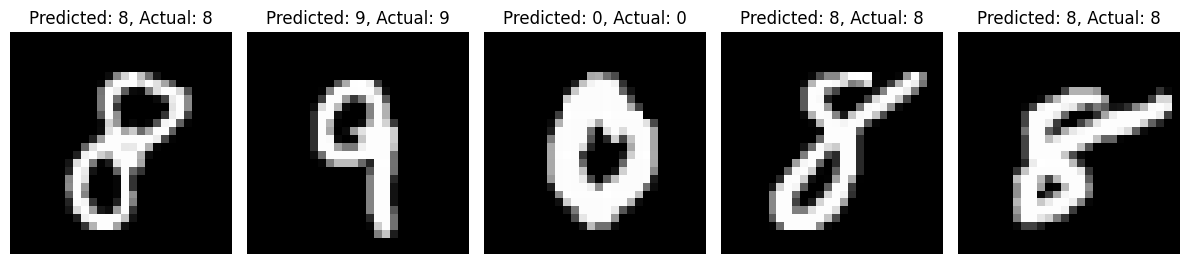

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Select random indices to compare
random_indices = np.random.choice(len(X_test), 5)

# Arrange images in a grid
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(random_indices) // num_cols)  # Ceiling division to calculate number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, idx in enumerate(random_indices):
    # Get prediction and actual label
    prediction = xgb_predictions[idx]
    actual_label = y_test[idx]

    # Reshape and plot the image
    image = X_test[idx].reshape(28, 28)
    ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

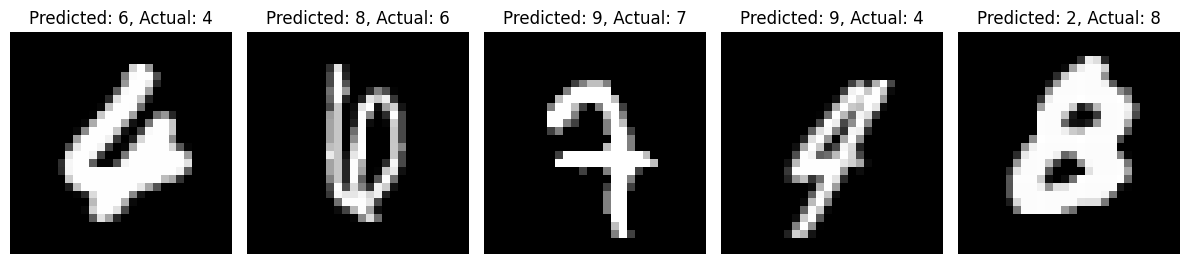

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Find indices where predictions are wrong
wrong_indices = np.where(xgb_predictions != y_test)[0]

# Select random wrong prediction indices if available
if len(wrong_indices) > 0:
    num_samples = min(5, len(wrong_indices))
    num_cols = 5  # Number of columns in the grid
    num_rows = -(-num_samples // num_cols)  # Ceiling division to calculate number of rows

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

    for i, idx in enumerate(np.random.choice(wrong_indices, num_samples, replace=False)):
        # Get prediction and actual label
        prediction = xgb_predictions [idx]
        actual_label = y_test[idx]

        # Reshape and plot the image
        image = X_test[idx].reshape(28, 28)
        ax = axs[i // num_cols, i % num_cols] if num_rows > 1 else axs[i % num_cols]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Predicted: {prediction}, Actual: {actual_label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No wrong predictions found.")